### BasIS model: 1D column experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from landlab import RasterModelGrid
from landlab.plot import imshow_grid

import sys
sys.path.append('/home/egp/repos/basal-ice-facies/basis/src/')
from src.basal_ice_stratigrapher import BasalIceStratigrapher

### Section 1) Particle velocity function

In [2]:
def calc_particle_velocity(G, T):
    """Calculate the velocity of an individual particle at the top of the frozen fringe layer."""
    
    A = 4.6e-21
    mu = 1.8e-3
    r = 5e-5
    Tm = 273
    
    coeff = A / (36 * np.pi * mu * r)
    velocity = coeff * G / (Tm - T)
    
    return velocity

### Section 2) Example column

### Characteristics:
- H = 110 m
- N = 100 kPa
- u$_b$ = 50 m a$^{-1}$
- Grid shape = (3, 3)

In [55]:
basis = BasalIceStratigrapher('./inputs/input_file.toml')
basis.calc_melt_rate()
basis.calc_thermal_gradients()

In [56]:
nt = 1590
dts = np.zeros(nt)
fringe = np.zeros(nt)
fringe_dt = np.zeros(nt)
disp = np.zeros(nt)
disp_dt = np.zeros(nt)
thetas = np.zeros(nt)
sats = np.zeros(nt)
temps = np.zeros(nt)
Gs = np.zeros(nt)
velocities = np.zeros(nt)

In [57]:
for i in range(100):
    dt = 1e-2 * i
    
    basis.run_one_step(dt, advection = False, dynamic_thinning = False)
    
    dts[i] = dt
    fringe[i] = basis.grid.at_node['frozen_fringe__thickness'][5]
    fringe_dt[i] = basis.grid.at_node['fringe__growth_rate'][5]
    disp[i] = basis.grid.at_node['dispersed_layer__thickness'][5]
    disp_dt[i] = basis.grid.at_node['dispersed_layer__growth_rate'][5]
    thetas[i] = basis.grid.at_node['fringe__undercooling'][5]
    sats[i] = basis.grid.at_node['fringe__saturation'][5]
    
    Tm = basis.parameters['melt_temperature']
    temps[i] = Tm - (Tm - basis.parameters['fringe_base_temperature']) * thetas[i]
    Gs[i] = (Tm - temps[i]) / basis.parameters['critical_depth']
    
    velocities[i] = calc_particle_velocity(Gs[i], temps[i])
    

In [59]:
for j in np.arange(100) + 1:
    dt = j
    
    basis.run_one_step(dt, advection = False, dynamic_thinning = False)
    
    dts[i + j] = dt
    fringe[i + j] = basis.grid.at_node['frozen_fringe__thickness'][5]
    fringe_dt[i + j] = basis.grid.at_node['fringe__growth_rate'][5]
    disp[i + j] = basis.grid.at_node['dispersed_layer__thickness'][5]
    disp_dt[i + j] = basis.grid.at_node['dispersed_layer__growth_rate'][5]
    thetas[i + j] = basis.grid.at_node['fringe__undercooling'][5]
    sats[i + j] = basis.grid.at_node['fringe__saturation'][5]
    
    Tm = basis.parameters['melt_temperature']
    temps[i + j] = Tm - (Tm - basis.parameters['fringe_base_temperature']) * thetas[i + j]
    Gs[i + j] = (Tm - temps[i + j]) / basis.parameters['critical_depth']
    
    velocities[i + j] = calc_particle_velocity(Gs[i + j], temps[i + j])

In [60]:
for k in np.arange(100) + 1:
    dt = 100
    
    basis.run_one_step(dt, advection = False, dynamic_thinning = False)
    
    dts [i + j + k]  = dt
    fringe [i + j + k]  = basis.grid.at_node['frozen_fringe__thickness'][5]
    fringe_dt [i + j + k]  = basis.grid.at_node['fringe__growth_rate'][5]
    disp [i + j + k]  = basis.grid.at_node['dispersed_layer__thickness'][5]
    disp_dt [i + j + k]  = basis.grid.at_node['dispersed_layer__growth_rate'][5]
    thetas [i + j + k]  = basis.grid.at_node['fringe__undercooling'][5]
    sats [i + j + k]  = basis.grid.at_node['fringe__saturation'][5]
    
    Tm = basis.parameters['melt_temperature']
    temps [i + j + k]  = Tm - (Tm - basis.parameters['fringe_base_temperature']) * thetas [i + j + k] 
    Gs [i + j + k]  = (Tm - temps [i + j + k] ) / basis.parameters['critical_depth']
    
    velocities [i + j + k]  = calc_particle_velocity(Gs [i + j + k] , temps [i + j + k] )

In [61]:
for l in np.arange(1000) + 1:
    dt = 315569.26
    
    basis.run_one_step(dt, advection = False, dynamic_thinning = False)
    
    dts [i + j + k + l]  = dt
    fringe [i + j + k + l]  = basis.grid.at_node['frozen_fringe__thickness'][5]
    fringe_dt [i + j + k + l]  = basis.grid.at_node['fringe__growth_rate'][5]
    disp [i + j + k + l]  = basis.grid.at_node['dispersed_layer__thickness'][5]
    disp_dt [i + j + k + l]  = basis.grid.at_node['dispersed_layer__growth_rate'][5]
    thetas [i + j + k + l]  = basis.grid.at_node['fringe__undercooling'][5]
    sats [i + j + k + l]  = basis.grid.at_node['fringe__saturation'][5]
    
    Tm = basis.parameters['melt_temperature']
    temps [i + j + k + l]  = Tm - (Tm - basis.parameters['fringe_base_temperature']) * thetas [i + j + k + l] 
    Gs [i + j + k + l]  = (Tm - temps [i + j + k + l] ) / basis.parameters['critical_depth']
    
    velocities [i + j + k + l]  = calc_particle_velocity(Gs [i + j + k + l] , temps [i + j + k + l] )

In [62]:
# Note that there are 31,556,926 seconds per year = 366,941 seconds per step for 86 steps

for m in np.arange(290) + 1:
    dt = 366941
    
    for n in range(86):
        basis.run_one_step(dt, advection = False, dynamic_thinning = False)
    
    dts [i + j + k + l + m]  = dt * 86
    fringe [i + j + k + l + m]  = basis.grid.at_node['frozen_fringe__thickness'][5]
    fringe_dt [i + j + k + l + m]  = basis.grid.at_node['fringe__growth_rate'][5]
    disp [i + j + k + l + m]  = basis.grid.at_node['dispersed_layer__thickness'][5]
    disp_dt [i + j + k + l + m]  = basis.grid.at_node['dispersed_layer__growth_rate'][5]
    thetas [i + j + k + l + m]  = basis.grid.at_node['fringe__undercooling'][5]
    sats [i + j + k + l + m]  = basis.grid.at_node['fringe__saturation'][5]
    Gs [i + j + k + l + m]  = basis.grid.at_node['dispersed_layer__gradient'][5]
    
    Tm = basis.parameters['melt_temperature']
    temps [i + j + k + l + m]  = Tm - (Tm - basis.parameters['fringe_base_temperature']) * thetas [i + j + k + l + m] 
    velocities [i + j + k + l + m]  = calc_particle_velocity(Gs [i + j + k + l + m] , temps [i + j + k + l + m] )
    
    # print('Completed year ' + str(m))

In [63]:
secpera = 31556926
ts = np.cumsum(dts) / secpera

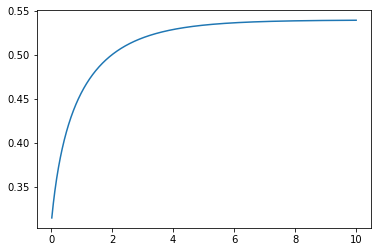

In [78]:
a = 301
b = 1300
plt.plot(ts[a:b], fringe[a:b])
plt.show()